<a href="https://colab.research.google.com/github/K-Hebel/WiDS_Chi/blob/master/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Competion - Data Exploration
by Karen H.

# Load Libraries and DataSets

In [2]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [5]:
#@title
!pip install dabl
import dabl

In [6]:
#@title
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"khebel","key":"11c0f35aedbce6808a3f45f82709accf"}'}

In [8]:
#@title
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
#@title
! kaggle competitions download -c 'widsdatathon2021'

UnlabeledWiDS2021.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
TrainingWiDS2021.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
DataDictionaryWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)
SolutionTemplateWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)
SampleSubmissionWiDS2021.csv: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
#@title
! unzip TrainingWiDS2021.csv.zip -d train

Archive:  TrainingWiDS2021.csv.zip
replace train/TrainingWiDS2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [11]:

#@title
data_dict=pd.read_csv("DataDictionaryWiDS2021.csv")
df=pd.read_csv("train/TrainingWiDS2021.csv")


# Preview of training dataset (df) and data dictionary (data_dict)

In [12]:
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [13]:
data_dict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0


## Initial Categories to Drop Based on Being Patient Vitals Agnostic



In [14]:
drop_cat=['Unnamed: 0'	,'encounter_id','hospital_id','elective_surgery','icu_id',	'pre_icu_los_days',	'readmission_status',\
          'hospital_admit_source',	'icu_admit_source',	'icu_stay_type',	'icu_type']

df=df.drop(drop_cat, axis=1)

In [15]:
df.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,125169.000000,125667.000000,128080.000000,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,58751.000000,58751.000000,53422.000000,53422.000000,116423.000000,116423.000000,113465.000000,113465.000000,11

## Dictionary of  unique categories in data_dict and their corresponding df[column name]

In [16]:
#Category Columns in Data_Dictionary
cat_col =list(data_dict['Category'].unique())
cat_col

['identifier',
 'demographic',
 'APACHE covariate',
 'vitals',
 'labs',
 'labs blood gas',
 'APACHE comorbidity',
 'Target Variable']

Create dictionary of all of the unique categories in data_dict and their corresponding variable name (df column name)

In [17]:

cat_dict={}

for category in cat_col:
  cat_dict[category]= list(data_dict[data_dict['Category'].isin([category, 'Target Variable'])]['Variable Name'].values)


In [396]:
#Training dataframe (df) Column Categories
identifier= [col for col in cat_dict['identifier'] if col in df.columns]
demographic= [col for col in cat_dict['demographic'] if col in df.columns]
APACHE_covariate= [col for col in cat_dict['APACHE covariate'] if col in df.columns]
vitals= [col for col in cat_dict['vitals'] if col in df.columns]
labs= [col for col in cat_dict['labs'] if col in df.columns]
labs_blood_gas= [col for col in cat_dict['labs blood gas'] if col in df.columns]
APACHE_comorbidity= [col for col in cat_dict['APACHE comorbidity'] if col in df.columns]

In [397]:
demographic

['age', 'bmi', 'ethnicity', 'gender', 'height', 'weight', 'diabetes_mellitus']

#Stratified Random Sampling of DataSet to Balance Binary Target Variable Data

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.631


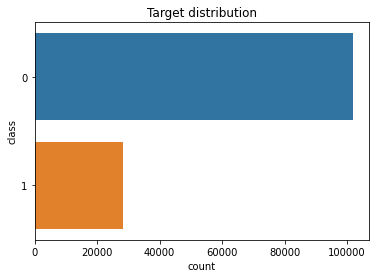

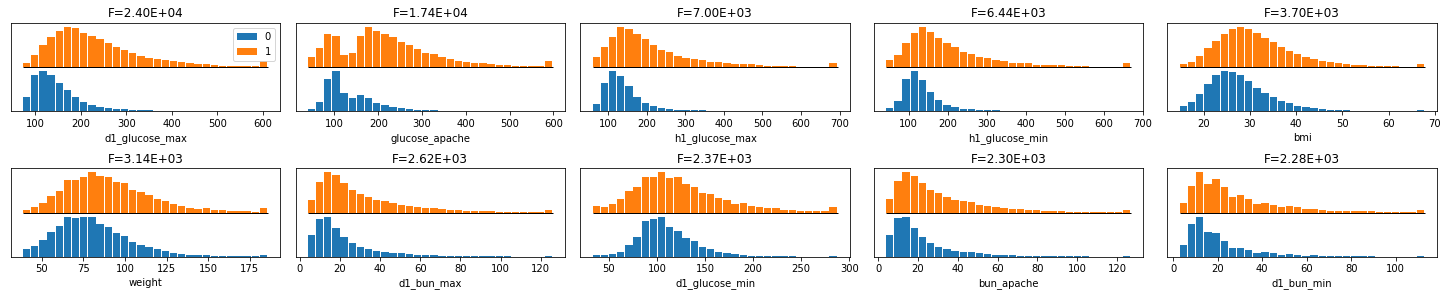

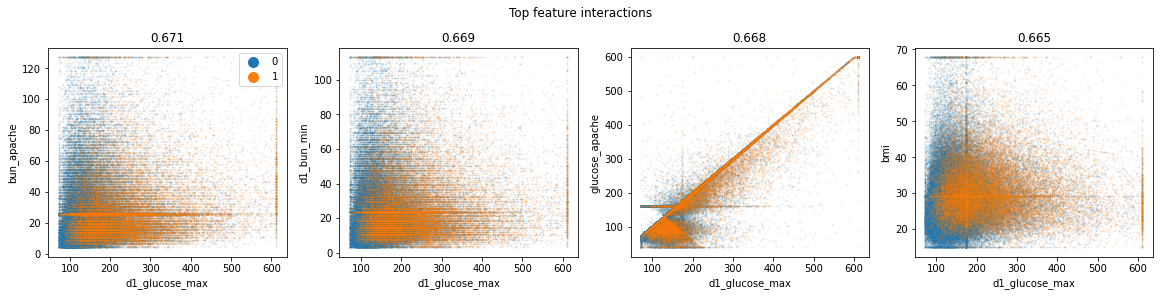

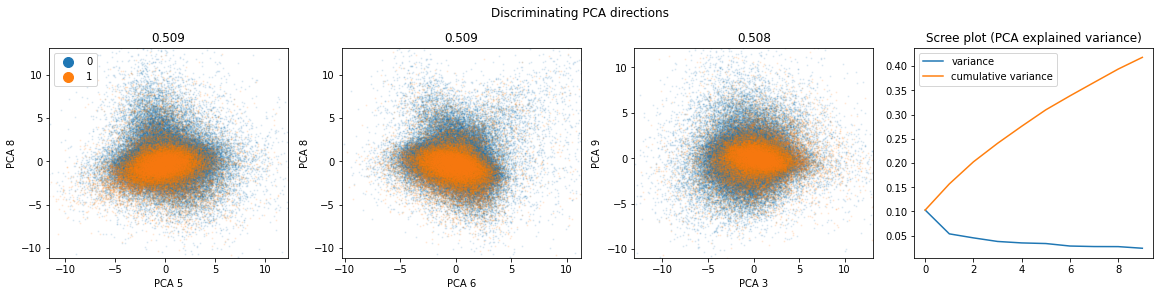

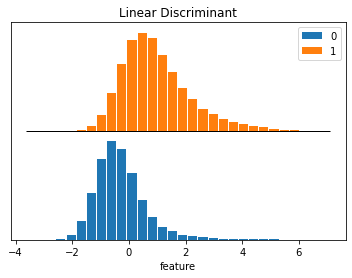

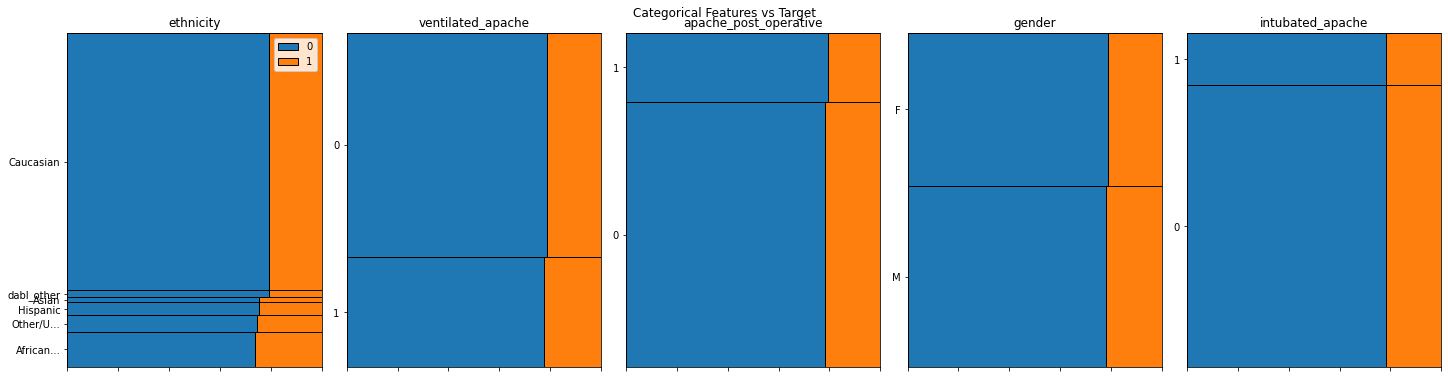

In [20]:
dabl.plot(df, target_col='diabetes_mellitus')

In [21]:
df['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [50]:
sample_1=df.groupby('diabetes_mellitus', group_keys=False).apply(lambda x: x.sample(25000))
sample_1.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,48324.000000,48255.000000,49250.000000,48648.000000,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,13492.000000,13492.000000,49909.000000,49909.000000,49355.000000,49355.00000,49924.000000,49924.000000,13545.000000,13545.000000,49895.000000,49895.000000,49095.000000,49095.000000,49757.000000,49757.000000,49828.000000,49828.000000,13502.000000,13502.000000,49911.000000,49911.000000,49360.000000,49360.000000,48261.000000,48261.000000,9747.000000,9747.000000,47870.000000,47870.000000,45588.000000,45588.000000,48443.000000,48443.000000,9743.000000,9743.000000,47492.000000,47492.000000,44828.000000,44828.000000,47554.000000,47554.000000,47618.000000,47618.000000,9758.000000,9758.000000,47874.000000,47874.000000,45592.000000,45592.000000,38557.000000,38557.000000,22925.000000,22925.000000,20705.000000,20705.000000,45153.000000,45153.000000,44100.000000,44100.000000,45314.000000,45314.000000,47628.000000,47628.000000,42624.000000,42624.0000

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 155 continuous features
Linear Discriminant Analysis training set score: 0.737


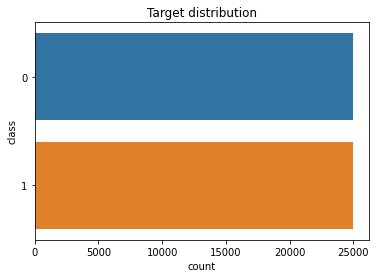

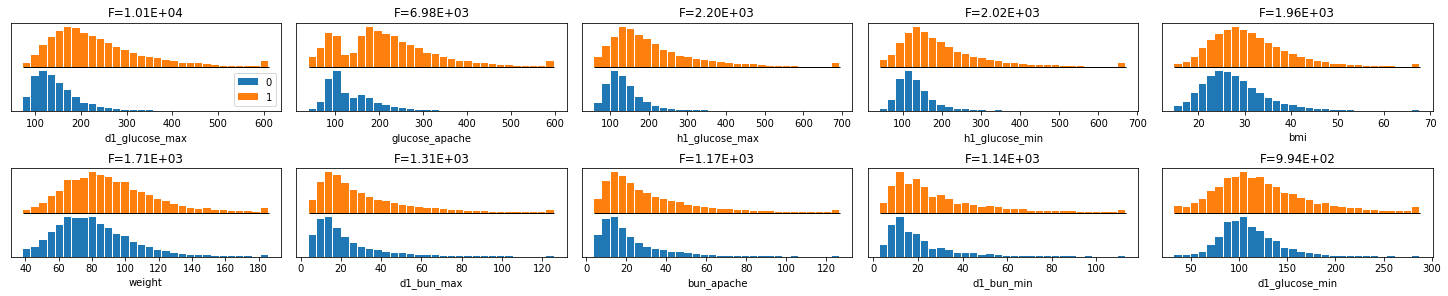

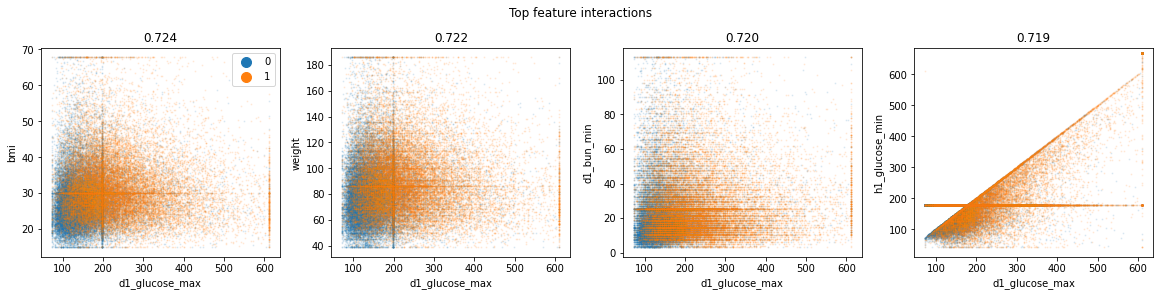

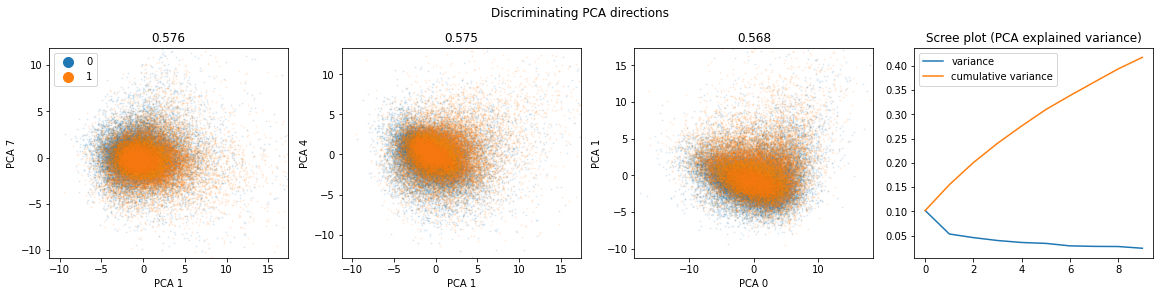

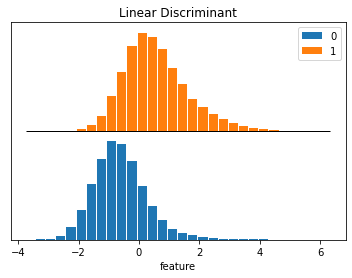

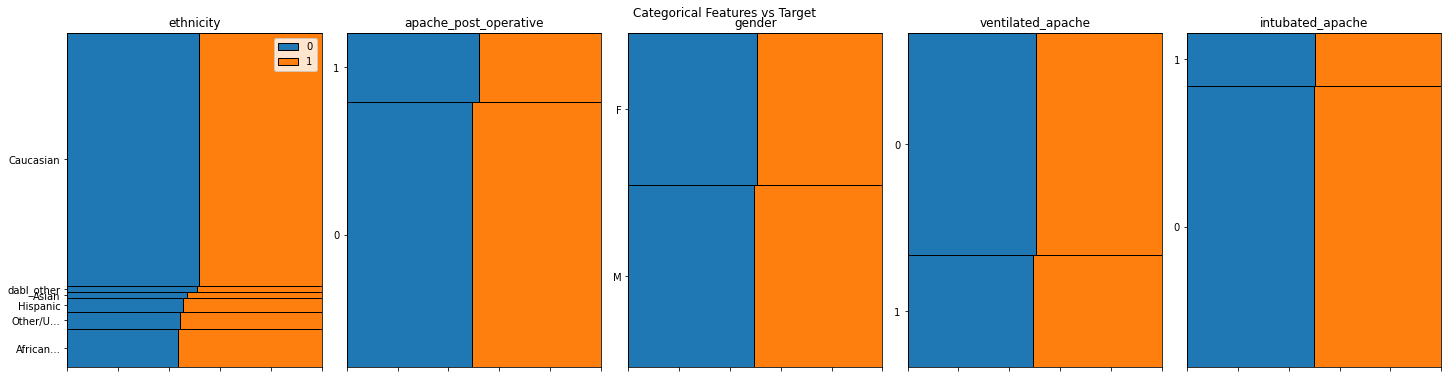

In [23]:
dabl.plot(sample_1, target_col='diabetes_mellitus')

# Analysis of 'lab', 'vitals', 'lab blood gas' dataset categories for first hour (h1) and first 24_hours (d1) in ICU

##Separate labs between 1_hour (h1) labs and 24_hour (d1) labs


In [42]:
day_labs=[]
hour_labs=[]
for column in sample_1.columns:
  if column.split('_')[0]=='d1':
    day_labs.append(column)
  elif column.split('_')[0]=='h1':
    hour_labs.append(column)

##Normalize laboratory test data (h1, d1) using a min max scaler

In [364]:
#Normalize Dataframe based on labs in first 24 hours  in ICU

norm_day_labs = sample_1[day_labs].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

norm_day_labs.describe()

,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min
count,13492.000000,13492.000000,49909.000000,49909.000000,49355.000000,49355.000000,49924.000000,49924.000000,13545.000000,13545.000000,49895.000000,49895.000000,49095.000000,49095.000000,49757.000000,49757.000000,49828.000000,49828.000000,13502.000000,13502.000000,49911.000000,49911.000000,49360.000000,49360.000000,48261.000000,48261.000000,22925.000000,22925.000000,20705.000000,20705.000000,45153.000000,45153.000000,44100.000000,44100.000000,45314.000000,45314.000000,47628.000000,47628.000000,42624.000000,42624.000000,43819.000000,43819.000000,44055.000000,44055.000000,18730.000000,18730.000000,13580.000000,13580.000000,42944.000000,42944.000000,45583.000000,45583.000000,45305.000000,45305.000000,43392.000000,43392.000000,17881.000000,17881.000000,17729.000000,17729.000000,18067.000000,18067.000000,14349.000000,14349.000000
mean,0.287773,0.490374,0.355056,0.473002,0.356499,0.473774,0.377836,0.441414,0.267827,0.509295,0.358004,0.468621,0.366560,0.469058,0.189043,0.182757,0.992860,0.903948,0.372327,0.516819,0.418278,0.471309,0.417749,0.471283,0.458325,0.740185,0.511225,0.520253,0.015324,0.014710,0.193434,0.202441,0.479204,0.558176,0.119062,0.121861,0.232946,0.333764,0.443970,0.500839,0.435884,0.481489,0.444706,0.488277,0.100528,0.109629,0.129159,0.114087,0.323209,0.330251,0.356505,0.454580,0.459487,0.569706,0.253656,0.261526,0.291016,0.332836,0.587691,0.645296,0.245462,0.174078,0.296180,0.327627
std,0.150566,0.148971,0.171099,0.172828,0.170960,0.173231,0.182685,0.107062,0.173798,0.149510,0.170920,0.171497,0.173896,0.171884,0.135675,0.073458,0.017846,0.100864,0.143417,0.151588,0.185012,0.176267,0.185216,0.176505,0.146119,0.130738,0.194290,0.195331,0.035634,0.034999,0.175884,0.177851,0.160573,0.163613,0.152170,0.149786,0.184280,0.167413,0.158258,0.163740,0.205176,0.202485,0.197943,0.198368,0.140469,0.142147,0.157298,0.140528,0.160576,0.163202,0.163279,0.174069,0.137928,0.136453,0.150764,0.147807,0.157621,0.156018,0.152265,0.167632,0.209287,0.141508,0.166499,0.208377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187500,0.404762,0.235294,0.363636,0.235294,0.363636,0.252101,0.375000,0.176056,0.444444,0.241935,0.355556,0.247934,0.355556,0.102564,0.144928,0.990000,0.890000,0.281250,0.432099,0.288732,0.352941,0.288732,0.352778,0.375000,0.712401,0.382353,0.382353,0.003333,0.003460,0.073770,0.081751,0.369565,0.458333,0.041783,0.044616,0.104089,0.227

In [52]:
#Include normalized day_labs data in sample dataset

sample_2a = sample_1
sample_2a[list(norm_day_labs.columns)]=norm_day_labs
sample_2a.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,48324.000000,48255.000000,49250.000000,48648.000000,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,13492.000000,13492.000000,49909.000000,49909.000000,49355.000000,49355.000000,49924.000000,49924.000000,13545.000000,13545.000000,49895.000000,49895.000000,49095.000000,49095.000000,49757.000000,49757.000000,49828.000000,49828.000000,13502.000000,13502.000000,49911.000000,49911.000000,49360.000000,49360.000000,48261.000000,48261.000000,9747.000000,9747.000000,47870.000000,47870.000000,45588.000000,45588.000000,48443.000000,48443.000000,9743.000000,9743.000000,47492.000000,47492.000000,44828.000000,44828.000000,47554.000000,47554.000000,47618.000000,47618.000000,9758.000000,9758.000000,47874.000000,47874.000000,45592.000000,45592.000000,38557.000000,38557.000000,22925.000000,22925.000000,20705.000000,20705.000000,45153.000000,45153.000000,44100.000000,44100.000000,45314.000000,45314.000000,47628.000000,47628.000000,42624.000000,42624.000

In [278]:
#Normalize witn MaxMinScaler Dataframe based on labs in first 1 hour in ICU

norm_hour_labs = sample_2a[hour_labs].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

norm_hour_labs.describe()

,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
count,9747.000000,9747.000000,47870.000000,47870.000000,45588.000000,45588.000000,48443.000000,48443.000000,9743.000000,9743.000000,47492.000000,47492.000000,44828.000000,44828.000000,47554.000000,47554.000000,47618.000000,47618.000000,9758.000000,9758.000000,47874.000000,47874.000000,45592.000000,45592.000000,38557.000000,38557.000000,4426.000000,4426.000000,4047.000000,4047.000000,10253.000000,10253.000000,9904.000000,9904.000000,10343.000000,10343.000000,23592.000000,23592.000000,9600.000000,9600.000000,10663.000000,10663.000000,10583.000000,10583.000000,18730.000000,18730.000000,4573.000000,4573.000000,9502.000000,9502.000000,11955.000000,11955.000000,11532.000000,11532.000000,9399.000000,9399.000000,8945.000000,8945.000000,8862.000000,8862.000000,9032.000000,9032.000000,6651.000000,6651.000000
mean,0.339002,0.430604,0.357020,0.437250,0.358496,0.436900,0.392929,0.443238,0.226890,0.507477,0.363362,0.438558,0.369586,0.441278,0.256456,0.090325,0.981216,0.952452,0.408403,0.500393,0.398621,0.449299,0.397396,0.447303,0.543801,0.579488,0.526686,0.526347,0.015851,0.015841,0.179398,0.179201,0.467317,0.499319,0.115489,0.115632,0.203130,0.215805,0.490778,0.489057,0.488904,0.487328,0.489860,0.489132,0.100528,0.109629,0.149148,0.147321,0.311549,0.310125,0.369422,0.367817,0.558102,0.551580,0.286442,0.285410,0.305560,0.306945,0.633963,0.641944,0.251540,0.230546,0.298261,0.321097
std,0.158739,0.165287,0.174828,0.177623,0.174313,0.176660,0.183515,0.186583,0.118566,0.143936,0.176770,0.178350,0.179989,0.179531,0.151546,0.031672,0.031751,0.065303,0.163254,0.169370,0.187840,0.189558,0.188728,0.189118,0.127749,0.125503,0.200763,0.200718,0.038468,0.038470,0.170005,0.169885,0.150802,0.147017,0.146974,0.147201,0.169227,0.161221,0.164687,0.164850,0.187049,0.189520,0.187474,0.190244,0.140469,0.142147,0.166662,0.166004,0.164584,0.165021,0.164223,0.166095,0.130993,0.129482,0.159487,0.159061,0.150086,0.151895,0.167207,0.165699,0.220094,0.201586,0.194851,0.208454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.317647,0.235849,0.318681,0.233645,0.315217,0.262712,0.314815,0.164403,0.416667,0.241379,0.311321,0.245614,0.320755,0.163265,0.068783,0.970000,0.940000,0.298343,0.381604,0.263514,0.312057,0.256757,0.316901,0.491803,0.531250,0.388889,0.388889,0.003460,0.003460,0.068702,0.068702,0.379310,0.415628,0.041688,0.041811,0.094333,0.113057,0.424242,0.424242,0.3577

In [279]:
#Include normalized hour_labs data in sample dataset

sample_2b = sample_2a
sample_2b[list(norm_hour_labs.columns)]=norm_hour_labs


In [71]:
sample_2b.describe()

,age,bmi,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,48324.000000,48255.000000,49250.000000,48648.000000,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,13492.000000,13492.000000,49909.000000,49909.000000,49355.000000,49355.000000,49924.000000,49924.000000,13545.000000,13545.000000,49895.000000,49895.000000,49095.000000,49095.000000,49757.000000,49757.000000,49828.000000,49828.000000,13502.000000,13502.000000,49911.000000,49911.000000,49360.000000,49360.000000,48261.000000,48261.000000,9747.000000,9747.000000,47870.000000,47870.000000,45588.000000,45588.000000,48443.000000,48443.000000,9743.000000,9743.000000,47492.000000,47492.000000,44828.000000,44828.000000,47554.000000,47554.000000,47618.000000,47618.000000,9758.000000,9758.000000,47874.000000,47874.000000,45592.000000,45592.000000,38557.000000,38557.000000,22925.000000,22925.000000,20705.000000,20705.000000,45153.000000,45153.000000,44100.000000,44100.000000,45314.000000,45314.000000,47628.000000,47628.000000,42624.000000,42624.000

##Drop lab columns where count is < 20% of sample index count (50,000)

In [72]:
#List of all lab column names - Join norm_hour_labs and norm_day_labs column names into a single list all_lab_columns
all_lab_columns=list(norm_hour_labs.columns.values)
for col in list(norm_day_labs.columns):
  all_lab_columns.append(col)

In [74]:
labs_under_20per =[]

for col in all_lab_columns:
  if sample_2b[col].count()/sample_2b.count()[-1]< .2:
    labs_under_20per.append(col)

In [76]:
labs_under_20per

['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_wbc_max',
 'h1_wbc_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [274]:
sample_2b.shape

(50000, 170)

In [79]:
sample_2c = sample_2b
for col in labs_under_20per:
  sample_2c=sample_2c.drop(col, axis=1)
  norm_hour_labs=norm_hour_labs.drop(col, axis=1)
sample_2c.shape

(50000, 142)

##Correlation Matrix table for Diabetes_Mellitus and 24_hour labs, vitals, labs_blood_ gas (d1)

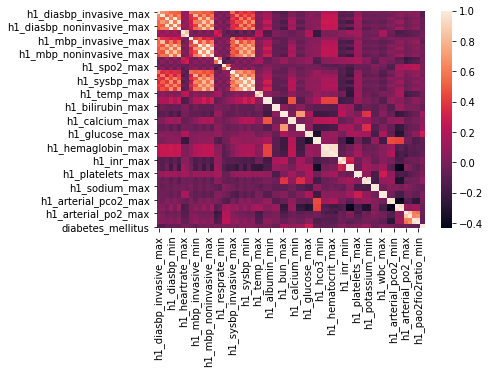

In [285]:
#Correleation for 1 hour labs
norm_hour_labs['diabetes_mellitus']= sample_2c['diabetes_mellitus']
sns.heatmap(norm_hour_labs.corr());

In [288]:
matrix_hour_pairs=norm_hour_labs.corr().unstack().sort_values(kind="quicksort")

In [291]:
diabetes_matrix_hour_pairs= [(pair,matrix_hour_pairs[pair]) for pair in matrix_hour_pairs.index if 'diabetes_mellitus'in list(pair)[0]]

In [292]:
hour_labs_corr=pd.DataFrame(diabetes_matrix_pairs, columns=['Feature_pair', 'Corr'])
hour_labs_corr

,Feature_pair,Corr
0,"(diabetes_mellitus, h1_hemaglobin_min)",-0.080501
1,"(diabetes_mellitus, h1_hemaglobin_max)",-0.076513
2,"(diabetes_mellitus, h1_diasbp_min)",-0.072770
3,"(diabetes_mellitus, h1_diasbp_noninvasive_min)",-0.070406
4,"(diabetes_mellitus, h1_hematocrit_max)",-0.057928
5,"(diabetes_mellitus, h1_hematocrit_min)",-0.055497
6,"(diabetes_mellitus, h1_diasbp_max)",-0.051764
7,"(diabetes_mellitus, h1_diasbp_noninvasive_max)",-0.048338
8,"(diabetes_mellitus, h1_sodium_max)",-0.043981
9,"(diabetes_mellitus, h1_sodium_min)",-0.041827


##Correlation Matrix table for Diabetes_Mellitus and 24_hour labs, vitals, labs_blood_ gas (d1)

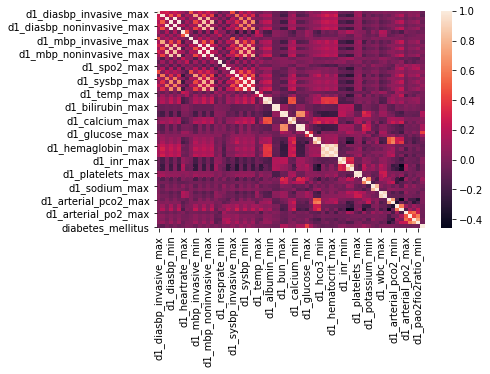

In [268]:
#Correleation for 24 hour (d1) labs
norm_day_labs['diabetes_mellitus']= sample_2c['diabetes_mellitus']
sns.heatmap(norm_day_labs.corr());

In [269]:
matrix_day_pairs=norm_day_labs.corr().unstack().sort_values(kind="quicksort")

In [270]:
diabetes_matrix_day_pairs= [(pair,matrix_day_pairs[pair]) for pair in matrix_day_pairs.index if 'diabetes_mellitus'in list(pair)[0]]

In [271]:
day_labs_corr=pd.DataFrame(diabetes_matrix_day_pairs, columns=['Feature_pair', 'Corr'])
day_labs_corr

,Feature_pair,Corr
0,"(diabetes_mellitus, d1_diasbp_invasive_min)",-0.109908
1,"(diabetes_mellitus, d1_hemaglobin_max)",-0.090583
2,"(diabetes_mellitus, d1_hematocrit_max)",-0.075323
3,"(diabetes_mellitus, d1_hemaglobin_min)",-0.070825
4,"(diabetes_mellitus, d1_diasbp_invasive_max)",-0.069681
5,"(diabetes_mellitus, d1_diasbp_min)",-0.063492
6,"(diabetes_mellitus, d1_diasbp_noninvasive_min)",-0.062476
7,"(diabetes_mellitus, d1_hematocrit_min)",-0.058690
8,"(diabetes_mellitus, d1_sodium_min)",-0.058298
9,"(diabetes_mellitus, d1_hco3_min)",-0.056516


##Drop columns with near zero correlation (abs < .1)

In [315]:
zero_day_corr=list(day_labs_corr[abs(day_labs_corr['Corr'])<0.09]['Feature_pair'])

In [316]:
zero_hour_corr=list(hour_labs_corr[abs(hour_labs_corr['Corr'])<0.09]['Feature_pair'])

In [319]:
zero_corr_columns=[]
for i in range(len(zero_day_corr)):
  zero_corr_columns.append(zero_day_corr[i][1])

for i in range(len(zero_hour_corr)):
  zero_corr_columns.append(zero_hour_corr[i][1])

len(zero_corr_columns)

82

In [320]:
len(norm_day_labs.columns)+len(norm_hour_labs.columns)

130

##Drop from Sample data labels that show little to no correlation to target variable

In [321]:
sample_2d=sample_2c.drop(zero_corr_columns, axis=1)

In [322]:
sample_2d.shape

(50000, 60)

##EDA of Sample based on revised Lab features within the first hour (h1) and 24 hours (d1)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 45 continuous features
Linear Discriminant Analysis training set score: 0.725


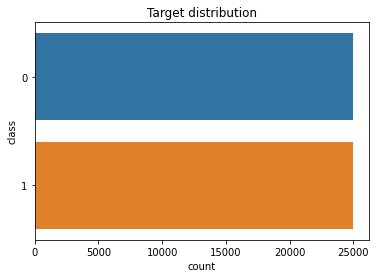

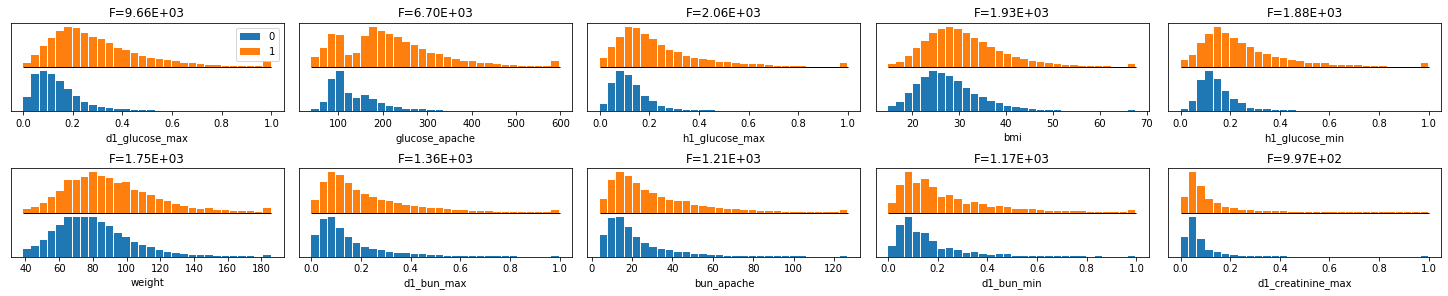

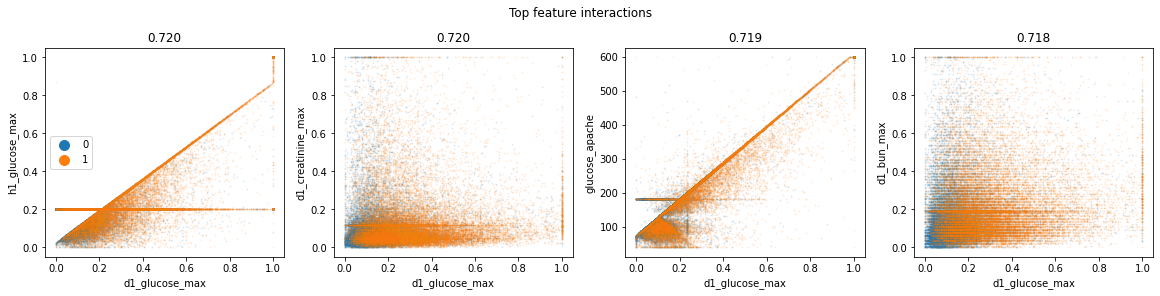

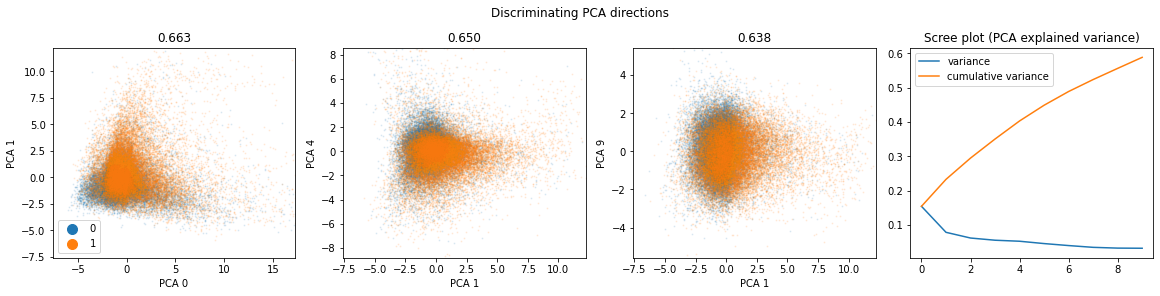

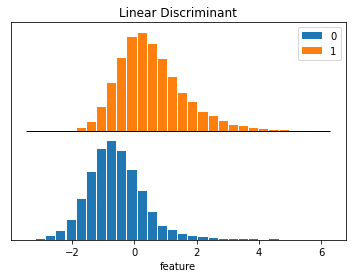

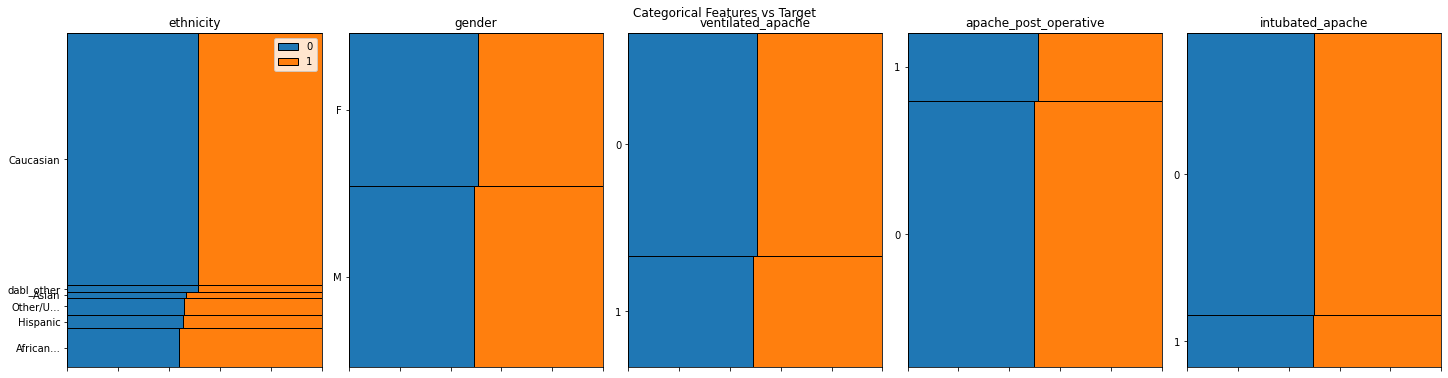

In [323]:
dabl.plot(sample_2d, target_col='diabetes_mellitus')

# Analysis of Demographic Data

In [369]:
sample_3a=sample_2d

In [398]:
demo1 = sample_3a[demographic]

In [399]:
demo1.ethnicity.value_counts()/demo1.ethnicity.count(),demo1.ethnicity.value_counts()


(Caucasian           0.763199
 African American    0.117743
 Other/Unknown       0.052535
 Hispanic            0.040306
 Asian               0.017869
 Native American     0.008348
 Name: ethnicity, dtype: float64, Caucasian           37757
 African American     5825
 Other/Unknown        2599
 Hispanic             1994
 Asian                 884
 Native American       413
 Name: ethnicity, dtype: int64)

In [400]:
demo1.gender.value_counts()/demo1.gender.count(), demo1.gender.value_counts()

(M    0.541386
 F    0.458614
 Name: gender, dtype: float64, M    27059
 F    22922
 Name: gender, dtype: int64)

##Demographic Heatmap

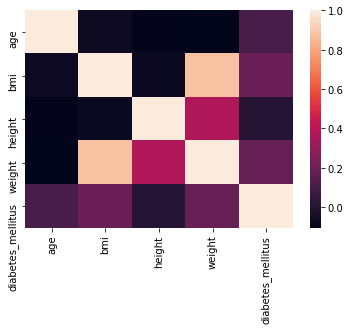

In [401]:
#Correleation for demographic data
sns.heatmap(demo1.corr());

##Drop height from the dataset as there is no corrolation

In [402]:
demographic.remove('height')

In [350]:

sample_3b =sample_3.drop('height', axis=1)

##Encode categorical demographic data (ethincity, gender)

In [365]:
demo_cat=pd.get_dummies(sample_3b[['gender','ethnicity']])


In [404]:
demographic2=demographic+list(demo_cat.columns)
demographic2.remove('gender')
demographic2.remove('ethnicity')

##Join encoded demographic data for ethnicity and gender to sample dataset (sample_3c) and drop 'ethnicity' and 'gender' columns

In [422]:
sample_3c = sample_3b.join(demo_cat)
sample_3c=sample_3c.drop(['gender','ethnicity'], axis=1)
sample_3c.head()

,age,bmi,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_min,d1_sysbp_noninvasive_max,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hemaglobin_max,d1_potassium_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_potassium_max,h1_potassium_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
12420,66.0,23.994509,67.40,2.9,303.0,211.10,0,0,2.1,58.0,3.50,0.5,4.0,6.0,0.0,5.0,100.0,143.0,47.7,0,43.0,36.0,36.0,52.3,7.362,56.0,133.0,37.10,176.9472,0,7.20,NaN,0.246479,0.352459,0.399673,0.212628,0.241754,0.100372,0.262745,0.778846,0.404762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
33248,59.0,24.330463,66.32,NaN,308.0,1902.05,1,0,NaN,10.0,0.70,NaN,4.0,6.0,0.0,5.0,119.0,53.0,36.1,0,132.0,NaN,NaN,NaN,NaN,6.0,140.0,36.10,1540.3392,0,9.90,NaN,0.443662,0.049180,0.063584,0.033426,0.041503,0.085502,0.337255,0.528846,0.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
66005,79.0,19.886776,54.80,NaN,116.0,103.01,0,0,NaN,23.0,0.57,NaN,4.0,6.0,0.0,5.0,300.0,54.0,34.3,0,52.0,NaN,NaN,NaN,NaN,30.0,136.0,36.27,NaN,0,6.55,NaN,0.239437,0.155738,0.181670,0.026927,0.028014,0.421933,0.545098,0.528846,0.333333,NaN,NaN,NaN,NaN,0.282999,0.313694,NaN,NaN,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
23655,55.0,33.057851,90.00,NaN,112.0,107.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,92.0,NaN,0,74.0,NaN,NaN,NaN,NaN,11.0,NaN,36.50,2557.3536,0,NaN,NaN,0.281690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
44294,61.0,29.231074,88.50,NaN,308.0,1207.01,1,0,NaN,16.0,0.90,0.5,4.0,6.0,0.0,5.0,107.0,109.0,35.1,1,122.0,41.1,41.1,116.0,7.385,35.0,135.0,36.40,1100.2176,1,16.02,0.666667,0.471831,0.098361,0.118085,0.051996,0.062254,0.141264,0.290196,0.605769,0.452381,0.091603,0.091603,0.050558,0.050707,0.141499,0.160828,0.340426,0.347826,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [356]:
sample_3c.shape

(50000, 67)

##Normalize demographic - age, weight, bmi using a max min scaler

In [423]:
sample_3d =sample_3c

sample_3d[['age','bmi','weight']] = sample_3d[['age','bmi','weight']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
sample_3d.describe()


,age,bmi,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_min,d1_sysbp_noninvasive_max,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hemaglobin_max,d1_potassium_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_potassium_max,h1_potassium_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
count,48324.000000,48255.000000,48648.000000,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,13492.000000,49360.000000,45153.000000,45153.000000,45314.000000,45314.000000,47628.000000,47628.000000,43819.000000,45583.000000,10253.000000,10253.000000,10343.000000,10343.000000,23592.000000,23592.000000,11955.000000,11955.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.706806,0.287468,0.324280,2.870647,185.556459,561.117967,0.202960,0.040060,1.129182,27.717680,1.610762,0.594773,3.503663,5.504475,0.010403,4.057311,182.471309,99.525977,32.692060,0.154920,87.155035,42.207027,42.207027,129.437131,7.350956,25.075208,137.792420,36.419729,1815.391216,0.334080,12.233814,0.490374,0.417749,0.193434,0.202441,0.119062,0.121861,0.232946,0.333764,0.435884,0.356505,0.179398,0.179201,0.115489,0.115632,0.203130,0.215805,0.369422,0.367817,0.000700,0.016580,0.013820,0.02574,0.007500,0.004280,0.019700,0.500000,0.458440,0.541180,0.116500,0.017680,0.755140,0.039880,0.008260,0.051980
std,0.180074,0.162989,0.175127,0.673318,86.344738,460.926257,0.402207,0.196102,2.178230,21.601864,1.656807,0.264451,0.926798,1.254207,0.101465,1.523264,103.787349,30.398522,6.747115,0.361832,42.121762,12.380313,12.380313,82.672467,0.099359,15.069669,5.294419,0.857519,1468.862065,0.471673,6.915921,0.148971,0.185216,0.175884,0.177851,0.152170,0.149786,0.184280,0.167413,0.205176,0.163279,0.170005,0.169885,0.146974,0.147201,0.169227,0.161221,0.164223,0.166095,0.026449,0.127693,0.116745,0.15836,0.086278,0.065282,0.138969,0.500005,0.498275,0.498306,0.320827,0.131787,0.430008,0.195679,0.090509,0.221989
min,0.000000,0.000000,0.000000,1.200000,101.000000,0.010000,0.000000,0.000000,0.100000,4.000000,0.300000,0.210000,1.000000,1.000000,0.000000,1.000000,39.000000,30.000000,16.200000,0.000000,40.000000,18.000000,18.000000,31.000000,6.960540,4.000000,117.000000,32.100000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.606742,0.177137,0.200136,2.400000,113.000000,203.010000,0.000000,0.000000,0.400000,13.000000,0.740000,0.400000,3.000000,6.000000,0.000000,4.000000,101.000000,86.000000,27.900000,0.000000,53.000000,34.500000,34.500000,77.000000,7.300000,11.000000,135.000000,36.200000,795.290400,0.000000,7.600000,0.404762,0.288732,0.0737

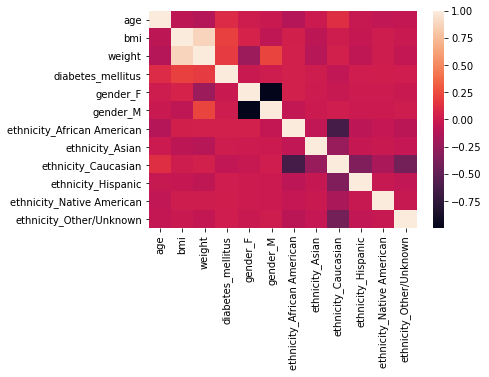

In [424]:
demo2= sample_3d[demographic2]

#Correleation for demographic data
adj_heatmap=sns.heatmap(demo2.corr())
adj_heatmap;

##Demographic Matrix Corr Pairs

In [410]:
matrix_demo_pairs=demo2.corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_demo_pairs= [(pair,matrix_demo_pairs[pair]) for pair in matrix_demo_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
demo_corr=pd.DataFrame(diabetes_matrix_demo_pairs, columns=['Feature_pair', 'Corr'])
demo_corr

,Feature_pair,Corr
0,"(diabetes_mellitus, ethnicity_Caucasian)",-0.053999
1,"(diabetes_mellitus, gender_F)",-0.013406
2,"(diabetes_mellitus, ethnicity_Asian)",0.008499
3,"(diabetes_mellitus, gender_M)",0.013767
4,"(diabetes_mellitus, ethnicity_Hispanic)",0.019011
5,"(diabetes_mellitus, ethnicity_Other/Unknown)",0.020091
6,"(diabetes_mellitus, ethnicity_Native American)",0.025412
7,"(diabetes_mellitus, ethnicity_African American)",0.044947
8,"(diabetes_mellitus, age)",0.106116
9,"(diabetes_mellitus, weight)",0.186470


##Based on the lack of even moderate correlation between ethnicity, gender and diabetes - we will drop these columns from the sample dataset

In [425]:
drop_demo=list(demo_cat.columns)

In [463]:
sample_3e=sample_3d

sample_3e=sample_3e.drop(drop_demo, axis=1)

In [465]:
sample_3e.diabetes_mellitus.count()

50000

##EDA of Sample_3e based on revised Demographic features 

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 44 continuous features
Linear Discriminant Analysis training set score: 0.725


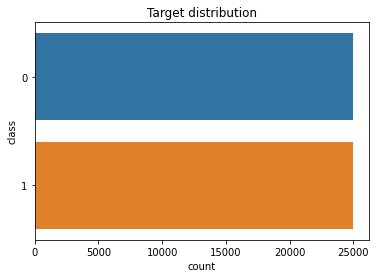

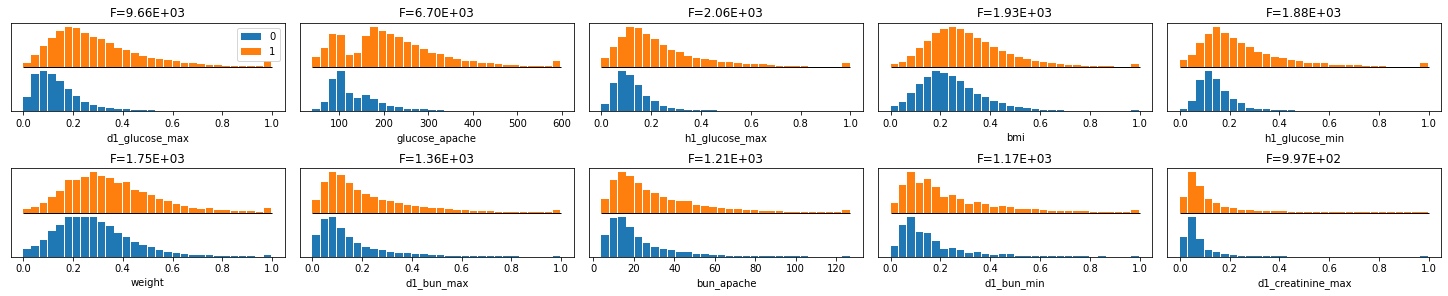

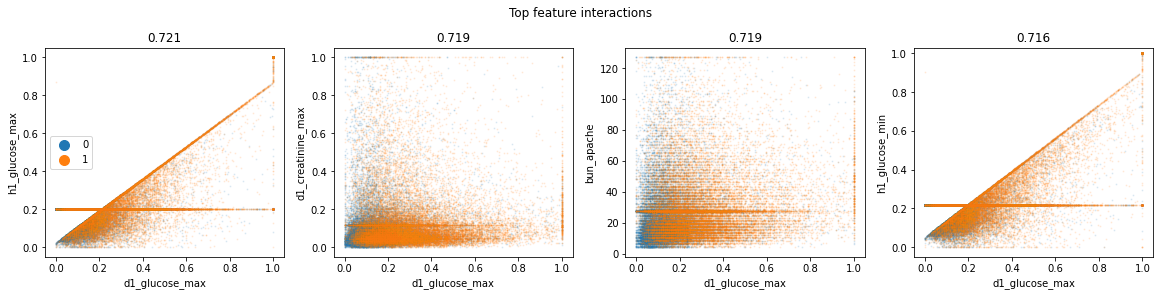

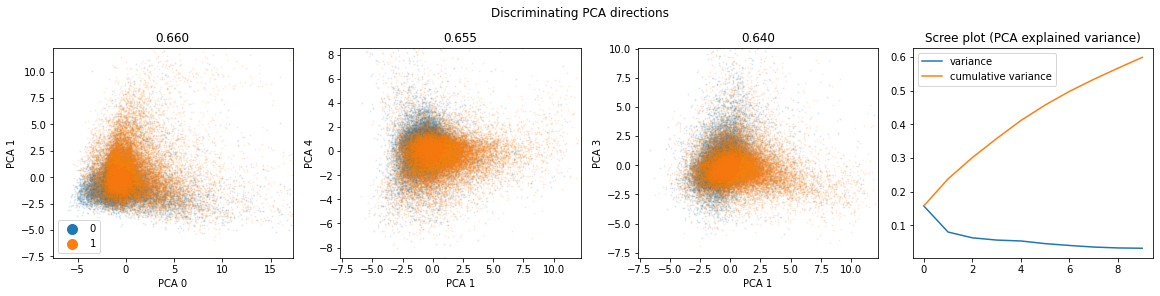

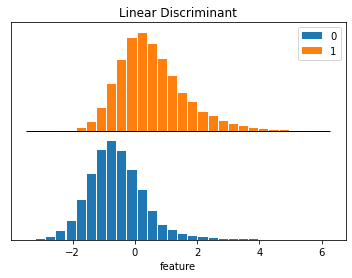

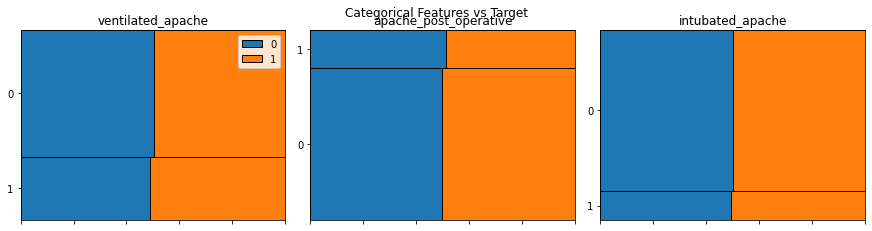

In [428]:
dabl.plot(sample_3e, 'diabetes_mellitus')


#Analysis of APACHE_covariate Data

##APACHE_covariate Heatmaps and description

In [467]:
sample_4=sample_3e

sample_4[APACHE_covariate ].describe()

,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,diabetes_mellitus
count,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,50000.000000
mean,2.870647,185.556459,561.117967,0.202960,0.040060,1.129182,27.717680,1.610762,0.594773,3.503663,5.504475,0.010403,4.057311,182.471309,99.525977,32.692060,0.154920,87.155035,42.207027,42.207027,129.437131,7.350956,25.075208,137.792420,36.419729,1815.391216,0.334080,12.233814,0.500000
std,0.673318,86.344738,460.926257,0.402207,0.196102,2.178230,21.601864,1.656807,0.264451,0.926798,1.254207,0.101465,1.523264,103.787349,30.398522,6.747115,0.361832,42.121762,12.380313,12.380313,82.672467,0.099359,15.069669,5.294419,0.857519,1468.862065,0.471673,6.915921,0.500005
min,1.200000,101.000000,0.010000,0.000000,0.000000,0.100000,4.000000,0.300000,0.210000,1.000000,1.000000,0.000000,1.000000,39.000000,30.000000,16.200000,0.000000,40.000000,18.000000,18.000000,31.000000,6.960540,4.000000,117.000000,32.100000,0.000000,0.000000,0.900000,0.000000
25%,2.400000,113.000000,203.010000,0.000000,0.000000,0.400000,13.000000,0.740000,0.400000,3.000000,6.000000,0.000000,4.000000,101.000000,86.000000,27.900000,0.000000,53.000000,34.500000,34.500000,77.000000,7.300000,11.000000,135.000000,36.200000,795.290400,0.000000,7.600000,0.000000
50%,2.900000,123.000000,410.010000,0.000000,0.000000,0.600000,20.000000,1.040000,0.500000,4.000000,6.000000,0.000000,5.000000,162.000000,104.000000,32.800000,0.000000,66.000000,40.100000,40.100000,102.000000,7.360000,27.000000,138.000000,36.500000,1463.356800,0.000000,10.500000,0.500000
75%,3.300000,301.000000,703.030000,0.000000,0.000000,1.040000,35.000000,1.700000,0.850000,4.000000,6.000000,0.000000,5.000000,232.000000,119.000000,37.400000,0.000000,124.000000,47.000000,47.000000,151.000000,7.411000,35.000000,141.000000,36.700000,2453.846400,1.000000,15.200000,1.000000
max,4.600000,308.000000,2201.050000,1.000000,1.000000,60.200000,127.000000,11.180000,1.000000,4.000000,6.000000,1.000000,5.000000,598.700000,178.000000,51.400000,1.000000,200.000000,95.000000,95.000000,498.000000,7.590000,60.000000,158.000000,39.700000,8716.669632,1.000000,45.800000,1.000000


##Normalize APACHE_covariate data

In [468]:
sample_4[APACHE_covariate] = sample_4[APACHE_covariate].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
norm_covariate= sample_4[APACHE_covariate]
norm_covariate.describe()

,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,diabetes_mellitus
count,20284.000000,49461.000000,49759.000000,50000.000000,50000.000000,18451.000000,40758.000000,40944.000000,11761.000000,49275.000000,49275.000000,49793.000000,49275.000000,45715.000000,49909.000000,39800.000000,50000.000000,49870.000000,11761.000000,11761.000000,11761.000000,11761.000000,49706.000000,41084.000000,47476.000000,25122.000000,50000.000000,38806.000000,50000.000000
mean,0.491367,0.408485,0.254929,0.202960,0.040060,0.017124,0.192827,0.120474,0.487054,0.834554,0.900895,0.010403,0.764328,0.256336,0.469770,0.468524,0.154920,0.294719,0.314377,0.314377,0.210786,0.620239,0.376343,0.507132,0.568385,0.208267,0.334080,0.252423,0.500000
std,0.198035,0.417124,0.209413,0.402207,0.196102,0.036243,0.175625,0.152280,0.334748,0.308933,0.250841,0.101465,0.380816,0.185434,0.205395,0.191679,0.361832,0.263261,0.160783,0.160783,0.177029,0.157848,0.269101,0.129132,0.112831,0.168512,0.471673,0.154029,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.057971,0.092229,0.000000,0.000000,0.004992,0.073171,0.040441,0.240506,0.666667,1.000000,0.000000,0.750000,0.110774,0.378378,0.332386,0.000000,0.081250,0.214286,0.214286,0.098501,0.539288,0.125000,0.439024,0.539474,0.091238,0.000000,0.149220,0.000000
50%,0.500000,0.106280,0.186276,0.000000,0.000000,0.008319,0.130081,0.068015,0.367089,1.000000,1.000000,0.000000,1.000000,0.219761,0.500000,0.471591,0.000000,0.162500,0.287013,0.287013,0.152034,0.634607,0.410714,0.512195,0.578947,0.167880,0.000000,0.213808,0.500000
75%,0.617647,0.966184,0.319404,0.000000,0.000000,0.015641,0.252033,0.128676,0.810127,1.000000,1.000000,0.000000,1.000000,0.344828,0.601351,0.602273,0.000000,0.525000,0.376623,0.376623,0.256959,0.715629,0.553571,0.585366,0.605263,0.281512,1.000000,0.318486,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Replace APACHE_covariate original data with normalized data

In [469]:
sample_4[APACHE_covariate]=norm_covariate
sample_4b =sample_4

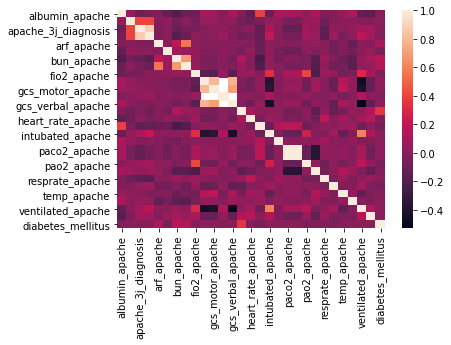

In [470]:
sns.heatmap(norm_covariate.corr())

In [471]:
matrix_covariate_pairs=norm_covariate .corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_covariate_pairs= [(pair,matrix_covariate_pairs[pair]) for pair in matrix_covariate_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
covariate_corr=pd.DataFrame(diabetes_matrix_covariate_pairs, columns=['Feature_pair', 'Corr'])
covariate_corr

,Feature_pair,Corr
0,"(diabetes_mellitus, hematocrit_apache)",-0.058985
1,"(diabetes_mellitus, bilirubin_apache)",-0.053384
2,"(diabetes_mellitus, sodium_apache)",-0.049544
3,"(diabetes_mellitus, pao2_apache)",-0.046858
4,"(diabetes_mellitus, ph_apache)",-0.024367
5,"(diabetes_mellitus, heart_rate_apache)",-0.022196
6,"(diabetes_mellitus, albumin_apache)",-0.019924
7,"(diabetes_mellitus, fio2_apache)",-0.017927
8,"(diabetes_mellitus, gcs_unable_apache)",-0.016051
9,"(diabetes_mellitus, apache_post_operative)",-0.011835


##Drop APACHE_covariate columns that have near 0 corrolation to 'diabetes_mellitus' from sample dataset (sample_4b)

In [472]:
zero_covariate_corr=list(covariate_corr[abs(covariate_corr['Corr'])<0.09]['Feature_pair'])
zero_covariate_corr

[('diabetes_mellitus', 'hematocrit_apache'),
 ('diabetes_mellitus', 'bilirubin_apache'),
 ('diabetes_mellitus', 'sodium_apache'),
 ('diabetes_mellitus', 'pao2_apache'),
 ('diabetes_mellitus', 'ph_apache'),
 ('diabetes_mellitus', 'heart_rate_apache'),
 ('diabetes_mellitus', 'albumin_apache'),
 ('diabetes_mellitus', 'fio2_apache'),
 ('diabetes_mellitus', 'gcs_unable_apache'),
 ('diabetes_mellitus', 'apache_post_operative'),
 ('diabetes_mellitus', 'resprate_apache'),
 ('diabetes_mellitus', 'apache_3j_diagnosis'),
 ('diabetes_mellitus', 'temp_apache'),
 ('diabetes_mellitus', 'wbc_apache'),
 ('diabetes_mellitus', 'map_apache'),
 ('diabetes_mellitus', 'intubated_apache'),
 ('diabetes_mellitus', 'apache_2_diagnosis'),
 ('diabetes_mellitus', 'paco2_for_ph_apache'),
 ('diabetes_mellitus', 'paco2_apache'),
 ('diabetes_mellitus', 'ventilated_apache'),
 ('diabetes_mellitus', 'urineoutput_apache'),
 ('diabetes_mellitus', 'gcs_verbal_apache'),
 ('diabetes_mellitus', 'gcs_eyes_apache'),
 ('diabetes_m

In [473]:
zero_corr_covariate_cols=[]
for i in range(len(zero_covariate_corr)):
  zero_corr_covariate_cols.append(zero_covariate_corr[i][1])

In [474]:
sample_4c=sample_4b.drop(zero_corr_covariate_cols, axis=1)
sample_4c.shape

(50000, 33)

#Analysis of APACHE_comorbidity Data

In [475]:
sample_5=sample_4c

,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.000700,0.016580,0.013820,0.02574,0.007500,0.004280,0.019700,0.500000
std,0.026449,0.127693,0.116745,0.15836,0.086278,0.065282,0.138969,0.500005
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


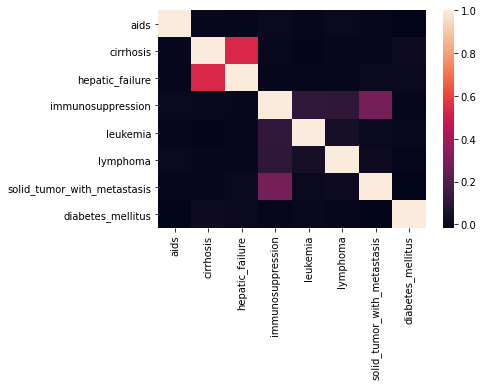

In [476]:
#Correleation for APACHE_comorbidity category    
sns.heatmap(sample_5[APACHE_comorbidity ].corr());
sample_5[APACHE_comorbidity ].describe()

In [477]:
matrix_comorbid_pairs=sample_5[APACHE_comorbidity ].corr().unstack().sort_values(kind="quicksort")
diabetes_matrix_comorbid_pairs= [(pair,matrix_comorbid_pairs[pair]) for pair in matrix_comorbid_pairs.index if 'diabetes_mellitus'in list(pair)[0]]
comorbid_corr=pd.DataFrame(diabetes_matrix_comorbid_pairs, columns=['Feature_pair', 'Corr'])
comorbid_corr

,Feature_pair,Corr
0,"(diabetes_mellitus, solid_tumor_with_metastasis)",-0.015687
1,"(diabetes_mellitus, aids)",-0.014368
2,"(diabetes_mellitus, immunosuppression)",-0.002905
3,"(diabetes_mellitus, lymphoma)",-0.000613
4,"(diabetes_mellitus, leukemia)",0.004868
5,"(diabetes_mellitus, hepatic_failure)",0.011136
6,"(diabetes_mellitus, cirrhosis)",0.020518
7,"(diabetes_mellitus, diabetes_mellitus)",1.000000


##Drop APACHE_comorbidity columns with absolute correlations to the target variable ('diatbetes_mellitus') <0.01.  Drop columns from sample dataset

In [478]:
zero_comorbid_corr=list(comorbid_corr[abs(comorbid_corr['Corr'])<0.01]['Feature_pair'])
zero_comorbid_corr

[('diabetes_mellitus', 'immunosuppression'),
 ('diabetes_mellitus', 'lymphoma'),
 ('diabetes_mellitus', 'leukemia')]

In [479]:
zero_corr_comorbid_cols=[]
for i in range(len(zero_comorbid_corr)):
  zero_corr_comorbid_cols.append(zero_comorbid_corr[i][1])

In [480]:
sample_5b=sample_5.drop(zero_corr_comorbid_cols, axis=1)
sample_5b.shape

(50000, 30)

In [482]:
sample_5b.describe()

,age,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,d1_diasbp_invasive_min,d1_sysbp_noninvasive_max,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hemaglobin_max,d1_potassium_max,h1_bun_max,h1_bun_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_potassium_max,h1_potassium_min,aids,cirrhosis,hepatic_failure,solid_tumor_with_metastasis,diabetes_mellitus
count,48324.000000,48255.000000,48648.000000,50000.000000,40758.000000,40944.000000,45715.000000,13492.000000,49360.000000,45153.000000,45153.000000,45314.000000,45314.000000,47628.000000,47628.000000,43819.000000,45583.000000,10253.000000,10253.000000,10343.000000,10343.000000,23592.000000,23592.000000,11955.000000,11955.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.706806,0.287468,0.324280,0.040060,0.192827,0.120474,0.256336,0.490374,0.417749,0.193434,0.202441,0.119062,0.121861,0.232946,0.333764,0.435884,0.356505,0.179398,0.179201,0.115489,0.115632,0.203130,0.215805,0.369422,0.367817,0.000700,0.016580,0.013820,0.019700,0.500000
std,0.180074,0.162989,0.175127,0.196102,0.175625,0.152280,0.185434,0.148971,0.185216,0.175884,0.177851,0.152170,0.149786,0.184280,0.167413,0.205176,0.163279,0.170005,0.169885,0.146974,0.147201,0.169227,0.161221,0.164223,0.166095,0.026449,0.127693,0.116745,0.138969,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.606742,0.177137,0.200136,0.000000,0.073171,0.040441,0.110774,0.404762,0.288732,0.073770,0.081751,0.041783,0.044616,0.104089,0.227451,0.278846,0.238095,0.068702,0.068702,0.041688,0.041811,0.094333,0.113057,0.255319,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.730337,0.257775,0.296472,0.000000,0.130081,0.068015,0.219761,0.488095,0.401408,0.131148,0.145336,0.066852,0.072630,0.182156,0.301961,0.423077,0.333333,0.122137,0.122137,0.065637,0.065830,0.150933,0.167197,0.340426,0.347826,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.842697,0.362981,0.415197,0.000000,0.252033,0.128676,0.344828,0.571429,0.535211,0.254098,0.263421,0.126277,0.128659,0.306691,0.407843,0.576923,0.428571,0.229008,0.221374,0.121516,0.121875,0.251555,0.264331,0.446809,0.453261,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Final Sample for cleaning

##The dataset saved for cleaning is named 'final_sample.csv' and is available on [my git hub site](https://github.com/K-Hebel/WiDS_Chi)

In [483]:
final_sample = sample_5b 
final_sample.to_csv('final_sample.csv')

!cp final_sample.csv "drive/My Drive/"